<a href="https://colab.research.google.com/github/arturomf94/estool/blob/master/simple_es_example_pso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/arturomf94/estool.git
import os
os.chdir('estool')

Cloning into 'estool'...
remote: Enumerating objects: 322, done.
remote: Counting objects: 100% (322/322), done.
remote: Compressing objects: 100% (262/262), done.
remote: Total 620 (delta 127), reused 250 (delta 60), pack-reused 298
Receiving objects: 100% (620/620), 4.78 MiB | 7.57 MiB/s, done.
Resolving deltas: 100% (235/235), done.


In [2]:
!pip install -r requirements.txt

     |████████████████████████████████| 163kB 8.7MB/s 
     |████████████████████████████████| 17.0MB 52.6MB/s 
     |████████████████████████████████| 245kB 45.5MB/s 
     |████████████████████████████████| 16.1MB 19.2MB/s 
     |████████████████████████████████| 450kB 44.3MB/s 
     |████████████████████████████████| 48.9MB 1.4MB/s 
     |████████████████████████████████| 184kB 46.4MB/s 
     |████████████████████████████████| 102kB 29.6MB/s 
  Created wheel for gym: filename=gym-0.9.4-cp36-none-any.whl size=215484 sha256=c354996e054496e4fd2d83e65727907933630b3799c7cfdef9fb1d884bcd4fb1
  Stored in directory: /root/.cache/pip/wheels/2f/ae/a0/126678adc5f1f8905309a4712ea29537999787f610edbcb0a4
  Created wheel for pybullet: filename=pybullet-1.6.3-cp36-cp36m-linux_x86_64.whl size=26923510 sha256=b5e59dae99a3d61a5d860c9ab8d4e3824fd405bb1a90cd1ec039724c297406a2
  Stored in directory: /root/.cache/pip/wheels/58/78/7f/fb2809c07e1da5117eaff2ada2f093faa882ff4393d2e7bab6
  Created wheel for bay

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cma
from es import SimpleGA, CMAES, PEPG, OpenES, Pyswarms

In [0]:
# from https://github.com/CMA-ES/pycma/blob/master/cma/fitness_functions.py
def rastrigin(x):
  """Rastrigin test objective function"""
  x = np.copy(x)
  #x -= 10.0
  if not np.isscalar(x[0]):
    N = len(x[0])
    return -np.array([10 * N + sum(xi**2 - 10 * np.cos(2 * np.pi * xi)) for xi in x])
  N = len(x)
  return -(10 * N + sum(x**2 - 10 * np.cos(2 * np.pi * x)))

def rastrigin_shifted(x):
  """Rastrigin test objective function, shifted by 10. units away from origin"""
  x = np.copy(x)
  x -= 10.0
  if not np.isscalar(x[0]):
    N = len(x[0])
    return -np.array([10 * N + sum(xi**2 - 10 * np.cos(2 * np.pi * xi)) for xi in x])
  N = len(x)
  return -(10 * N + sum(x**2 - 10 * np.cos(2 * np.pi * x)))

def schaffer(x):
    """ Schaffer function"""
    x = np.copy(x)
    #x -= 10.0
    N = len(x)
    s = x[0:N - 1]**2 + x[1:N]**2
    return -sum(s**0.25 * (np.sin(50 * s**0.1)**2 + 1))
  
def schaffer_shifted(x):
    """ Schaffer function shifted"""
    x = np.copy(x)
    x -= 10.0
    N = len(x)
    s = x[0:N - 1]**2 + x[1:N]**2
    return -sum(s**0.25 * (np.sin(50 * s**0.1)**2 + 1))

In [0]:
fit_func = rastrigin

In [0]:
NPARAMS = 100        # make this a 100-dimensinal problem.
NPOPULATION = 101    # use population size of 101.
MAX_ITERATION = 5000 # run each solver for 5000 generations.

In [0]:
# defines a function to use solver to solve fit_func
def test_solver(solver):
  history = []
  for j in range(MAX_ITERATION):
    solutions = solver.ask()
    fitness_list = np.zeros(solver.popsize)
    for i in range(solver.popsize):
      fitness_list[i] = fit_func(solutions[i])
    solver.tell(fitness_list)
    result = solver.result() # first element is the best solution, second element is the best fitness
    history.append(result[1])
    if (j+1) % 100 == 0:
      print("fitness at iteration", (j+1), result[1])
  print("local optimum discovered by solver:\n", result[0])
  print("fitness score at this local optimum:", result[1])
  return history


In [66]:
x = np.zeros(NPARAMS) # 100-dimensional problem
print("This is F(0):")
print(fit_func(x))

This is F(0):
-0.0


In [67]:
x = np.ones(NPARAMS)*10. # 100-dimensional problem
print("This is F(10):")
print(fit_func(x))


This is F(10):
-10000.0


In [0]:
# defines genetic algorithm solver
ga = SimpleGA(NPARAMS,                # number of model parameters
               sigma_init=1,        # initial standard deviation
               popsize=NPOPULATION,   # population size
               elite_ratio=0.1,       # percentage of the elites
               forget_best=False,     # forget the historical best elites
               weight_decay=0.00,     # weight decay coefficient
              )

In [69]:
ga_history = test_solver(ga)

fitness at iteration 100 -908.3373262777567
fitness at iteration 200 -908.3373262777567
fitness at iteration 300 -900.49188893527
fitness at iteration 400 -900.49188893527
fitness at iteration 500 -854.9509261863274
fitness at iteration 600 -854.9509261863274
fitness at iteration 700 -844.2452979964837
fitness at iteration 800 -844.2452979964837
fitness at iteration 900 -844.2452979964837
fitness at iteration 1000 -844.2452979964837
fitness at iteration 1100 -844.2452979964837
fitness at iteration 1200 -761.617044066277
fitness at iteration 1300 -761.617044066277
fitness at iteration 1400 -761.617044066277
fitness at iteration 1500 -747.6997192685004
fitness at iteration 1600 -720.4950860055297
fitness at iteration 1700 -705.3894569471963
fitness at iteration 1800 -681.1581786363279
fitness at iteration 1900 -627.6156821973447
fitness at iteration 2000 -587.8907218006528
fitness at iteration 2100 -496.2505431305488
fitness at iteration 2200 -453.9438034660719
fitness at iteration 2300 

In [70]:
# defines CMA-ES algorithm solver
cmaes = CMAES(NPARAMS,
              popsize=NPOPULATION,
              weight_decay=0.0,
              sigma_init = 1
          )


(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=920502, Tue Oct 22 16:34:42 2019)


In [71]:
cma_history = test_solver(cmaes)

fitness at iteration 100 -784.54074503721
fitness at iteration 200 -483.71612466105614
fitness at iteration 300 -40.224970128950304
fitness at iteration 400 -39.798739013182285
fitness at iteration 500 -39.79835747032541
fitness at iteration 600 -39.79835724606551
fitness at iteration 700 -39.79835724591271
fitness at iteration 800 -39.79835724591271
fitness at iteration 900 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=2.31e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=940)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=2.23e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=943)
  ')')


fitness at iteration 1000 -39.79835724591271
fitness at iteration 1100 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=1.54e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1121)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=1.59e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1194)
  ')')


fitness at iteration 1200 -39.79835724591271
fitness at iteration 1300 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=1.57e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1366)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=1.51e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1368)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=1.55e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1381)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 1400 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=1.43e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1401)
  ')')


fitness at iteration 1500 -39.79835724591271
fitness at iteration 1600 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=1.16e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1682)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=1.16e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1684)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=1.16e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1688)
  ')')


fitness at iteration 1700 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=1.24e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1709)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=1.25e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1716)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=1.00e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1774)
  ')')


fitness at iteration 1800 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=9.05e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1805)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=8.85e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1808)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=8.61e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1809)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 1900 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=6.54e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1901)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=6.37e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1902)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=6.29e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1903)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 2000 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=5.00e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2001)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.96e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2003)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=5.06e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2004)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 2100 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.22e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2101)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.16e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2102)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.17e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2103)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 2200 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=5.30e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2201)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=5.35e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2202)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=5.36e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2203)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 2300 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.87e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2301)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.85e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2302)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.83e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2303)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 2400 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=5.44e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2402)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=5.70e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2406)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=5.74e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2407)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 2500 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.03e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2502)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.06e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2503)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.97e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2504)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 2600 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=6.53e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2601)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=6.17e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2605)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=6.04e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2606)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 2700 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.80e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2701)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.80e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2702)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.83e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2703)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 2800 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=5.17e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2804)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=5.11e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2805)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=5.19e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2808)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 2900 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=5.62e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2901)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=5.67e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2902)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=5.82e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2903)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 3000 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.66e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3001)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.65e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3002)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.71e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3003)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 3100 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.25e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3101)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.26e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3102)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.28e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3103)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 3200 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.77e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3201)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.74e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3202)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.73e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3203)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 3300 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.11e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3301)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.09e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3302)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.08e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3303)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 3400 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.79e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3401)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.78e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3402)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.71e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3403)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 3500 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.53e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3501)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.55e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3502)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.59e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3503)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 3600 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=5.52e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3601)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=5.55e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3602)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=5.58e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3603)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 3700 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=5.90e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3701)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=5.98e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3702)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=6.33e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3708)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 3800 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.88e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3801)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.78e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3802)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.68e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3804)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 3900 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.73e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3901)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.69e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3902)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.63e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3903)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 4000 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.59e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4002)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.60e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4003)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.59e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4004)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 4100 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.28e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4101)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.32e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4102)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.40e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4103)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 4200 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.70e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4201)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.62e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4202)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.57e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4203)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 4300 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.86e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4301)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.91e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4302)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=3.95e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4303)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 4400 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.57e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4410)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.56e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4411)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.56e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4413)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 4500 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.30e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4502)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.27e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4503)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.32e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4504)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 4600 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=5.00e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4602)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.86e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4604)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=4.77e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4607)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 4700 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=6.85e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4701)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=6.94e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4702)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=7.04e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4703)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 4800 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=6.94e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4801)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=6.88e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4806)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=6.87e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4807)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 4900 -39.79835724591271


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=6.95e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4902)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=39.798357, sigma=7.78e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4914)
  ')')


fitness at iteration 5000 -39.79835724591271
local optimum discovered by solver:
 [-1.35008538e-10  1.98991223e+00 -9.94958637e-01  2.22058817e-09
 -9.94958636e-01  1.98071842e-09  4.89513110e-09  9.94958635e-01
  5.97856349e-10 -3.90802197e-09 -5.60412824e-09  3.17773850e-09
 -5.28824912e-09 -7.60947946e-09 -9.94958633e-01 -9.94958645e-01
 -6.91052149e-09  9.94958635e-01  5.00441185e-09 -7.27097344e-09
 -9.94958647e-01 -9.94958630e-01 -1.62241064e-09  5.52330230e-10
  3.12426607e-10 -9.94958631e-01 -2.21552917e-10 -2.13140604e-09
  2.01037726e-09  9.94958633e-01 -1.19444362e-09 -9.94958628e-01
 -9.94958644e-01  9.94958635e-01  9.94958637e-01  9.94958639e-01
 -1.82662697e-09  9.94958645e-01  8.94853884e-09 -9.94958642e-01
 -9.94958639e-01 -9.94958631e-01  4.55920535e-09  9.94958639e-01
  6.46631580e-09  4.91843710e-09  5.71588582e-09 -4.90055935e-09
  9.94958631e-01  8.76807201e-10  7.58372017e-11  9.94958633e-01
  9.94958641e-01  9.94958637e-01  6.98825635e-10 -9.40944245e-10
 -2.7121

In [0]:
# defines OpenAI's ES algorithm solver. Note that we needed to anneal the sigma parameter
oes = OpenES(NPARAMS,                  # number of model parameters
            sigma_init=1,            # initial standard deviation
            sigma_decay=0.999,         # don't anneal standard deviation
            learning_rate=0.1,         # learning rate for standard deviation
            learning_rate_decay = 1.0, # annealing the learning rate
            popsize=NPOPULATION,       # population size
            antithetic=False,          # whether to use antithetic sampling
            weight_decay=0.00,         # weight decay coefficient
            rank_fitness=False,        # use rank rather than fitness numbers
            forget_best=False)

In [73]:
oes_history = test_solver(oes)

fitness at iteration 100 -848.9702280790624
fitness at iteration 200 -824.4526711138111
fitness at iteration 300 -814.8284437658672
fitness at iteration 400 -803.4661362183608
fitness at iteration 500 -801.9404052822655
fitness at iteration 600 -793.8709476804661
fitness at iteration 700 -771.1815947277936
fitness at iteration 800 -771.1815947277936
fitness at iteration 900 -771.1815947277936
fitness at iteration 1000 -765.4434117004063
fitness at iteration 1100 -765.4434117004063
fitness at iteration 1200 -726.8526096194347
fitness at iteration 1300 -726.8526096194347
fitness at iteration 1400 -676.24832107973
fitness at iteration 1500 -654.6118374705391
fitness at iteration 1600 -540.6798464102825
fitness at iteration 1700 -510.12059441367524
fitness at iteration 1800 -475.50872416889
fitness at iteration 1900 -433.43489298994746
fitness at iteration 2000 -389.93827311307314
fitness at iteration 2100 -366.32939052877055
fitness at iteration 2200 -320.5109266119988
fitness at iteratio

In [0]:
pso = Pyswarms(num_params = NPARAMS,
          popsize = NPOPULATION,
          sigma_init = 1,
          weight_decay = 0.00)

In [75]:
pso_history = test_solver(pso)

fitness at iteration 100 -214.67421437660516
fitness at iteration 200 -159.81284561211123
fitness at iteration 300 -139.344101973364
fitness at iteration 400 -136.72851197839157
fitness at iteration 500 -136.53526997626523
fitness at iteration 600 -136.47186314595785
fitness at iteration 700 -136.43622605324936
fitness at iteration 800 -136.43595758612798
fitness at iteration 900 -136.38921990609595
fitness at iteration 1000 -136.36954481496878
fitness at iteration 1100 -132.49799498978234
fitness at iteration 1200 -132.49799469407515
fitness at iteration 1300 -132.4783900012029
fitness at iteration 1400 -132.47838992318157
fitness at iteration 1500 -132.47765035928012
fitness at iteration 1600 -132.47765035776092
fitness at iteration 1700 -132.46326062690832
fitness at iteration 1800 -120.08070242666213
fitness at iteration 1900 -120.08070242666213
fitness at iteration 2000 -120.08070242666201
fitness at iteration 2100 -120.08070023235405
fitness at iteration 2200 -117.49235605470233


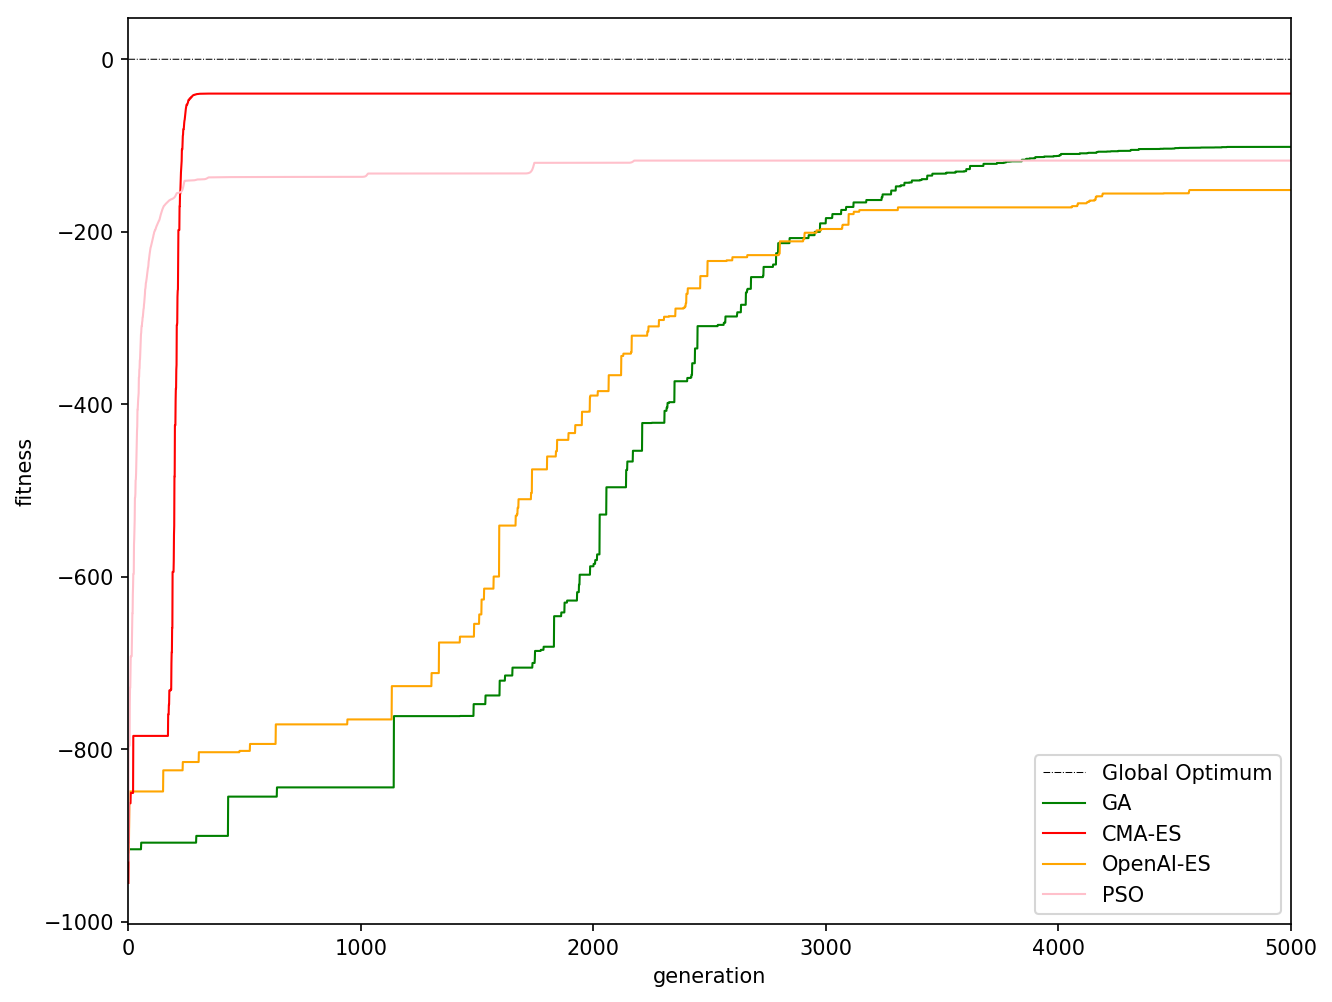

In [77]:
# Create a new figure of size 8x6 points, using 100 dots per inch
best_history = [0] * MAX_ITERATION
plt.figure(figsize=(10,8), dpi=150)

optimum_line, = plt.plot(best_history, color="black", linewidth=0.5, linestyle="-.", label='Global Optimum')
ga_line, = plt.plot(ga_history, color="green", linewidth=1.0, linestyle="-", label='GA')
oes_line, = plt.plot(oes_history, color="orange", linewidth=1.0, linestyle="-", label='OpenAI-ES')
#pepg_line, = plt.plot(pepg_history, color="blue", linewidth=1.0, linestyle="-", label='PEPG / NES')
cma_line, = plt.plot(cma_history, color="red", linewidth=1.0, linestyle="-", label='CMA-ES')
pso_line, = plt.plot(pso_history, color="pink", linewidth=1.0, linestyle="-", label='PSO')



plt.legend(handles=[optimum_line, ga_line, cma_line, oes_line, pso_line], loc=4)

# Set x limits
plt.xlim(0,MAX_ITERATION)
#plt.ylim(-1.1,0.01)

plt.xlabel('generation')
plt.ylabel('fitness')

# plt.savefig("./rastrigin_10d.svg")

plt.show()